In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
print('imports done')

imports done


In [2]:


# define a set of stopwords
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
    'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',
    'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most',
    'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
    "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
    'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'br'
])

# define function to clean strings and turn them into word lists
def clean_text(text):
    # Convert to lowercase, remove punctuation and digits, then split into words
    words = re.sub(r'[^\w\s]|\d', '', text.lower()).split()
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    return words

# read in data and clean it
df = pd.read_csv('reviews.csv')
df = df.drop('label', axis = 1)
df['list'] = df['text'].apply(clean_text)

# display it 
df.head


<bound method NDFrame.head of                                                     text  \
0      I grew up (b. 1965) watching and loving the Th...   
1      When I put this movie in my DVD player, and sa...   
2      Why do people who do not know what a particula...   
3      Even though I have great interest in Biblical ...   
4      Im a die hard Dads Army fan and nothing will e...   
...                                                  ...   
39995  "Western Union" is something of a forgotten cl...   
39996  This movie is an incredible piece of work. It ...   
39997  My wife and I watched this movie because we pl...   
39998  When I first watched Flatliners, I was amazed....   
39999  Why would this film be so good, but only gross...   

                                                    list  
0      [grew, b, watching, loving, thunderbirds, mate...  
1      [put, movie, dvd, player, sat, coke, chips, ex...  
2      [people, know, particular, time, past, like, f...  
3      [even,

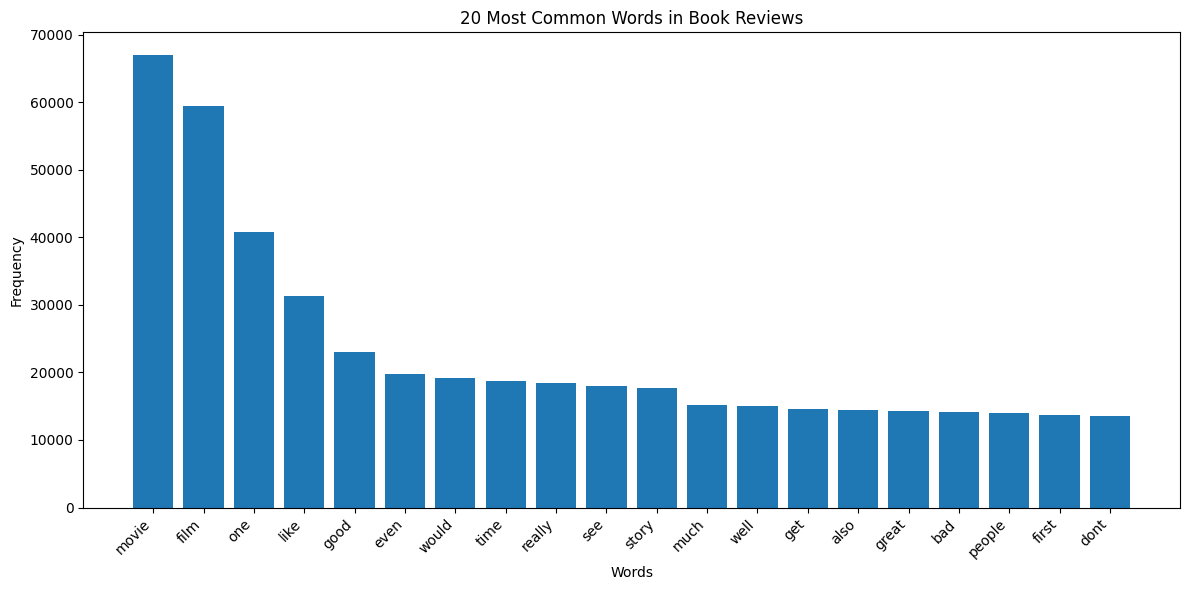

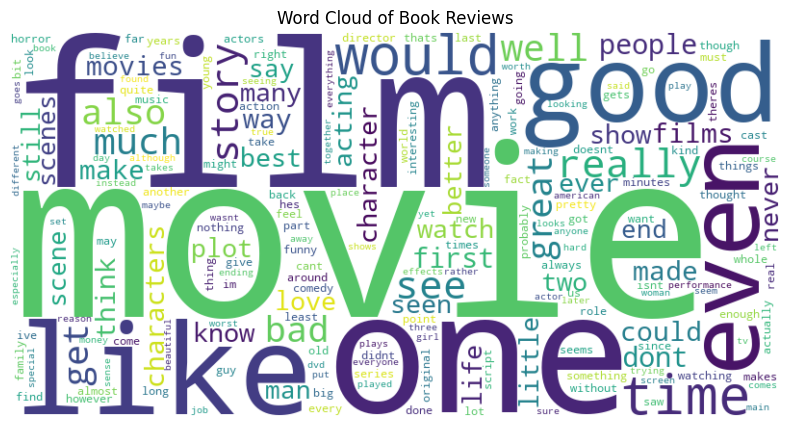

20 most common words:
movie: 66985
film: 59415
one: 40853
like: 31327
good: 22980
even: 19726
would: 19224
time: 18665
really: 18437
see: 18007
story: 17656
much: 15157
well: 15060
get: 14642
also: 14414
great: 14220
bad: 14163
people: 14052
first: 13630
dont: 13565


In [5]:
all_words = [word for words in df['list'] for word in words]
word_freq = Counter(all_words)

# Get the 20 most common words
common_words = word_freq.most_common(20)

# # Visualize with a bar chart
# plt.figure(figsize=(12, 6))
# words, counts = zip(*common_words)
# plt.bar(words, counts)
# plt.title('20 Most Common Words in Book Reviews')
# plt.xlabel('Words')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.savefig('common_words_bar_chart.png')
# plt.close()

# # Visualize with a word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Book Reviews')
# plt.savefig('word_cloud.png')
# plt.close()

# Visualize with a bar chart
plt.figure(figsize=(12, 6))
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title('20 Most Common Words in Book Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize with a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Reviews')
plt.show()

# Print the 20 most common words and their frequencies
print("20 most common words:")
for word, count in common_words:
    print(f"{word}: {count}")

In [4]:
# Lists of positive and negative words
positive_words = set([
    'good', 'great', 'excellent', 'wonderful', 'amazing', 'fantastic', 'terrific', 'outstanding',
    'superb', 'nice', 'lovely', 'beautiful', 'brilliant', 'best', 'favorite', 'loved', 'enjoyed',
    'awesome', 'fascinating', 'interesting', 'engaging', 'captivating', 'inspiring', 'insightful',
    'well-written', 'thought-provoking', 'masterpiece', 'compelling', 'powerful', 'moving'
])

negative_words = set([
    'bad', 'terrible', 'awful', 'horrible', 'disappointing', 'poor', 'mediocre', 'boring',
    'dull', 'uninteresting', 'confusing', 'frustrating', 'annoying', 'waste', 'disliked',
    'hated', 'worst', 'bland', 'predictable', 'shallow', 'poorly-written', 'overrated',
    'tedious', 'repetitive', 'slow', 'nonsensical', 'ridiculous', 'flawed', 'weak', 'irritating'
])

def sentiment_score(word_list):
    """
    Calculate sentiment score based on the number of positive and negative words.
    :param word_list: List of words from a review
    :return: Sentiment score (positive words count - negative words count)
    """
    positive_count = sum(1 for word in word_list if word in positive_words)
    negative_count = sum(1 for word in word_list if word in negative_words)
    return positive_count - negative_count

# Assuming df is your DataFrame and 'cleaned_words' is the column with lists of cleaned words
df['sentiment_score'] = df['list'].apply(sentiment_score)

# Categorize the sentiment
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Display the first few rows to check the results
print(df[['list', 'sentiment_score', 'sentiment_category']].head())

# Print overall sentiment distribution
print("\nSentiment Distribution:")
print(df['sentiment_category'].value_counts(normalize=True))

                                                list  sentiment_score  \
0  [grew, b, watching, loving, thunderbirds, mate...               -1   
1  [put, movie, dvd, player, sat, coke, chips, ex...                2   
2  [people, know, particular, time, past, like, f...                0   
3  [even, though, great, interest, biblical, movi...               -1   
4  [im, die, hard, dads, army, fan, nothing, ever...                1   

  sentiment_category  
0           Negative  
1           Positive  
2            Neutral  
3           Negative  
4           Positive  

Sentiment Distribution:
sentiment_category
Positive    0.554925
Negative    0.252050
Neutral     0.193025
Name: proportion, dtype: float64
